In [34]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

In [1]:
import pandas as pd
import numpy as np
import sys # 최대 정수
from tensorflow.keras import utils # utils.to_categorical() : 분류분석시 y데이터 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# 로지스틱 회귀분석(이진분류)
## 1. 데이터 셋 생성 & 전처리

In [3]:
# 1. csv파일을 데이터프레임으로 읽어오기(결측지처리, 균형확인 용이)
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.head()
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().sum() # 열별 결측치 갯수

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [9]:
# 타겟변수의 균형
df[8].value_counts()

0    500
1    268
Name: 8, dtype: int64

In [4]:
# 2. csv파일을 numpy 배열로 읽어오기 : np.loadtxt() #이 있는 행은 제외하고 읽어오기 
    # 기본 encoding=cp949
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',', encoding='utf-8')
dataset.shape

(768, 9)

In [7]:
# 데이터 분할 : 학습데이터셋(모델학습용) + 시험데이터셋(모델평가용)
X_train = dataset[:620, :-1]
y_train = dataset[:620, -1]
X_test  = dataset[620:, :-1]
y_test  = dataset[620:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((620, 8), (620,), (148, 8), (148,))

## 2. 모델구성

In [22]:
model = Sequential()
# model.add(Dense(units=32, input_dim=8, input_shape=(8,), activation='relu'))
model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='elu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                288       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [23]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. 학습

In [24]:
%%time
hist = model.fit(X_train, y_train, # 훈련데이터셋(학습데이터셋)
                epochs=200,
                batch_size=310,
#                 validation_data=(X_test, y_test), 검증데이터셋
                validation_split=0.1, # 검증데이터 비율(훈련데이터에서 10%를 검증용데이터로) 
                verbose=0) # 로그 출력 X

CPU times: total: 7.23 s
Wall time: 5.7 s


## 5. 모델 평가하기
- 학습과정 시각화하여 살펴보기
- 평가
- 교차표(혼동매트릭스, 성능평가지표) 그리기

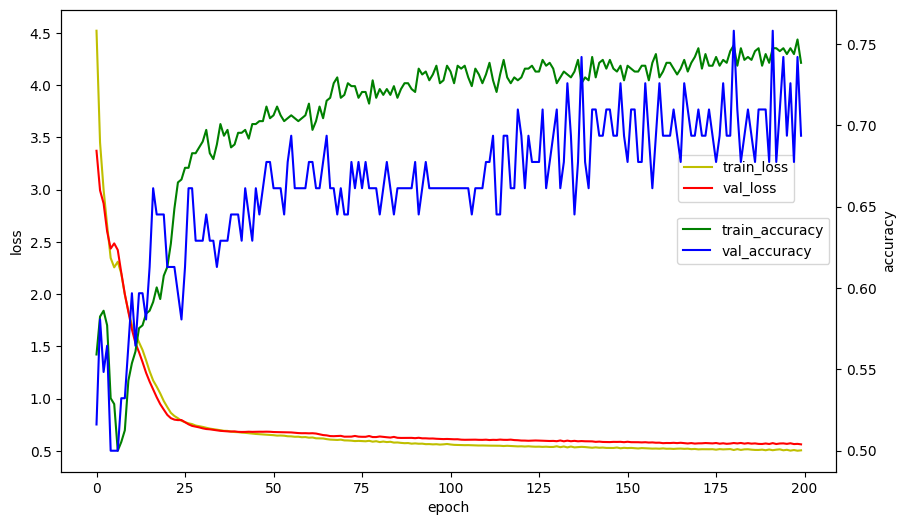

In [25]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [26]:
# 모델 평가(o)
score = model.evaluate(X_test, y_test)
print("loss : {}, 정확도 : {:.2f}%".format(score[0], score[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7027
loss : 0.6318081617355347, 정확도 : 70.27%


In [27]:
# 교차표(혼동매트릭스, 성능평가지표) 그리기 : 테스트셋의 실제값과 예측값
y_hat = (model.predict(X_test) > 0.5).astype(int)
y_test.shape, y_hat.shape # 실제값(1차원), 예측값(2차원)

5/5 [==============================] - 0s 998us/step


((148,), (148, 1))

In [28]:
TN = 0; FP=0; FN=0; TP=0;
for y, h in zip(y_test, y_hat.reshape(-1)):
#     print(y,h)
    if y==0 and h==0:
        TN += 1 # TN갯수 하나 증가
    elif y==0 and h==1:
        FP += 1
    elif y==1 and h==0:
        FN += 1
    elif y==1 and h==1:
        TP += 1
print(TN, FP)
print(FN, TP)

82 14
30 22


In [29]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

pd.crosstab(y_test, # 실제값
            y_hat.reshape(-1), # 예측값
           rownames=['실제값'], # index 이름
           colnames=['예측값']) # cilumn 이름

예측값,0,1
실제값,,
0.0,82,14
1.0,30,22


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat) # y_hat.reshape(-1)도 가능
# 결과가 numpy배열인 혼동행렬

array([[29, 12],
       [ 9, 18]], dtype=int64)

## 6. 모델사용(예측, 저장, 로드)

In [31]:
(model.predict([[2, 112,  86,  42, 160,  38.4,   0.246, 28]])>0.5 ).astype(int)

1/1 [==============================] - 0s 29ms/step


array([[0]])

In [32]:
(model.predict([[2, 112,  86,  42, 160,  38.4,   0.246, 28],
                [1, 115,  86,  42, 160,  38.4,   0.246, 60],
               ])>0.5 ).astype(int)

1/1 [==============================] - 0s 39ms/step


array([[0],
       [1]])

In [33]:
from tensorflow.keras.models import save_model, load_model
model.save('model/06_binary.h5')
save_model(model, 'model/06_binary.h5')

In [35]:
model2 = load_model('model/06_binary.h5')

In [36]:
(model2.predict([[2, 112,  86,  42, 160,  38.4,   0.246, 28]])>0.5 ).astype(int)

1/1 [==============================] - 0s 57ms/step


array([[0]])

# 분류분석
- 1. 데이터 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋 68으로 분리, 타겟변수의 원핫인코딩
- 2. 모델생성(input 8, output 2) : 출력층의 활성화함수 : 'softmax'
- 3. 모델학습과정 loss='categorical_crossentropy' metrics=['accuracy']
- 4. 모델 학습 validation_data = [X_val, Y_val] (검증데이터셋)
- 5. 모델 학습 평가
- 6. 모델 사용 - 예측시 argmax()함수 활용

## 1. 데이터셋 생성 및 전처리

In [2]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [3]:
# 훈련셋600, 검증셋100, 테스트셋68
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val   = dataset[600:700, :-1]
y_val   = dataset[600:700, -1]
X_test  = dataset[700:, :-1]
y_test  = dataset[700:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [4]:
# 분류분석을 위한 타겟(종속)변수의 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val, 2)
Y_test  = utils.to_categorical(y_test)
Y_train.shape, Y_val.shape, Y_test.shape

((600, 2), (100, 2), (68, 2))

In [56]:
print('원 데이터 :', y_train[:3])
print('원핫인코딩 데이터 :\n', Y_train[:3])

원 데이터 : [1. 0. 1.]
원핫인코딩 데이터 :
 [[0. 1.]
 [1. 0.]
 [0. 1.]]


## 2. 모델생성(input8, target2)

In [17]:
model = Sequential()
model.add(Dense(units=32, input_shape=(8,), activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                288       
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 2)                 34        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [19]:
hist = model.fit(X_train, Y_train, epochs=200, validation_data=(X_val, Y_val),
                verbose=1)

Epoch 1/200
19/19 [==============================] - 1s 9ms/step - loss: 10.9239 - accuracy: 0.3567 - val_loss: 3.0886 - val_accuracy: 0.4700
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 2.3639 - accuracy: 0.5450 - val_loss: 1.8073 - val_accuracy: 0.5000
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 1.4882 - accuracy: 0.5867 - val_loss: 1.2333 - val_accuracy: 0.5400
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 1.1232 - accuracy: 0.6283 - val_loss: 1.2186 - val_accuracy: 0.6600
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 1.0312 - accuracy: 0.6283 - val_loss: 0.8818 - val_accuracy: 0.6600
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.9492 - accuracy: 0.6433 - val_loss: 0.8700 - val_accuracy: 0.6800
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.6450 - val_loss: 0.9126 - val_accuracy: 0.6100
Epoch 8/200


Epoch 59/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7450 - val_loss: 0.6627 - val_accuracy: 0.6800
Epoch 60/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7100 - val_loss: 0.7019 - val_accuracy: 0.7000
Epoch 61/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7233 - val_loss: 0.5951 - val_accuracy: 0.7000
Epoch 62/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7433 - val_loss: 0.8405 - val_accuracy: 0.6800
Epoch 63/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7317 - val_loss: 0.6145 - val_accuracy: 0.7200
Epoch 64/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5069 - accuracy: 0.7550 - val_loss: 0.7146 - val_accuracy: 0.6700
Epoch 65/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.7267 - val_loss: 0.6472 - val_accuracy: 0.7200
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7750 - val_loss: 0.6214 - val_accuracy: 0.6400
Epoch 174/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7833 - val_loss: 0.6067 - val_accuracy: 0.7100
Epoch 175/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7883 - val_loss: 0.5621 - val_accuracy: 0.7300
Epoch 176/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7867 - val_loss: 0.5807 - val_accuracy: 0.7200
Epoch 177/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8000 - val_loss: 0.6492 - val_accuracy: 0.6500
Epoch 178/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4344 - accuracy: 0.7817 - val_loss: 0.5880 - val_accuracy: 0.7200
Epoch 179/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7867 - val_loss: 0.5804 - val_accuracy: 0.6900
Epoch 180/200

## 5. 모델 평가

In [11]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

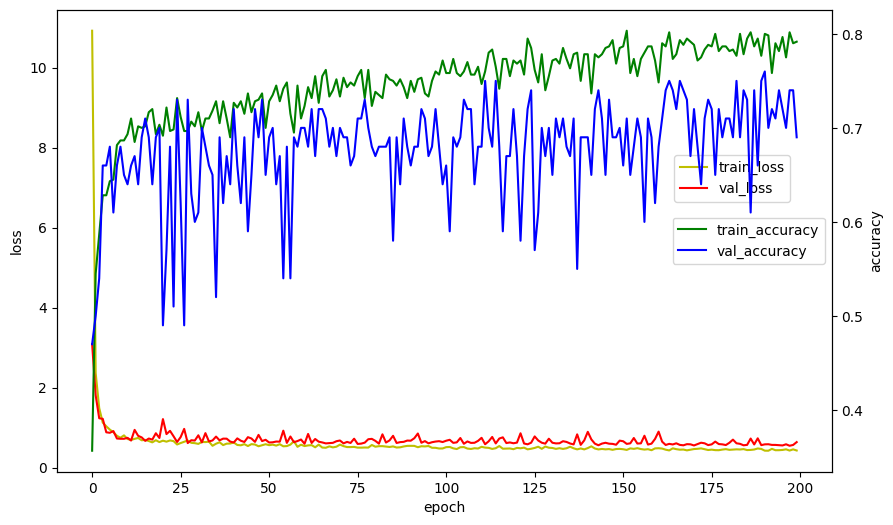

In [20]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [21]:
# 모델 평가
model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6912


[0.6376219987869263, 0.6911764740943909]

In [25]:
# 혼동행렬, 교차표 (원핫인코딩을 다시 복구)
# y_test 실제값
y_hat = model.predict(X_test).argmax(axis=1)

3/3 [==============================] - 0s 2ms/step


In [26]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1
실제값,,
0.0,29,12
1.0,9,18


In [32]:
confusion_matrix(y_test, y_hat)

array([[29, 12],
       [ 9, 18]], dtype=int64)

## 6. 모델 사용하기

In [28]:
X_test[0]

array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
        26.   ])

In [33]:
pred = model.predict(X_test[0].reshape(-1, 8))
pred.argmax(axis=1)

1/1 [==============================] - 0s 15ms/step


array([1], dtype=int64)